In [1]:
import ast
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt

# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #str to date
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #str to list to use explode 

# Updating Datasets
df['job_month_number'] = df['job_posted_date'].dt.month # create month number column

In [75]:
DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

DA_USA = DA_USA.explode('job_skills')
DA_USA = DA_USA.dropna(subset=['salary_year_avg'])
DA_USA.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month_number
723197,Data Analyst,Data Analyst - Financial Systems for greenfiel...,"Charlotte, NC",via LinkedIn,Full-time,False,Georgia,2023-09-04 21:36:10,False,False,United States,year,100000.0,NaN,The Talent Mine,azure,"{'analyst_tools': ['excel'], 'cloud': ['azure'...",9
500381,Data Analyst,"Sr. Data Analyst, Finance & Accounting","Montgomery, AL",via IT JobServe,Full-time,False,Georgia,2023-06-03 11:20:55,False,True,United States,year,81641.0,NaN,Sunrun,sql,"{'analyst_tools': ['tableau', 'sheets'], 'clou...",6


In [95]:
group = DA_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']) 

# First, sort by 'count' in descending order to identify the most in-demand skills.
# Then, take the top 10 and sort them by 'median' salary to present them in order of highest pay.
DemandSkills = group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

# Sort by 'median' salary in descending order to identify the top 10 highest-paying skills.
HighstSkills = group.sort_values(by='median', ascending=False).head(10)

DemandSkills, HighstSkills


(            count    median
 job_skills                 
 python       1431  97500.00
 tableau      1364  92875.00
 r             893  92500.00
 sql server    286  92500.00
 sql          2508  91000.00
 sas           926  90000.00
 power bi      838  90000.00
 powerpoint    462  85000.00
 excel        1808  84392.00
 word          461  81194.75,
               count    median
 job_skills                   
 dplyr             2  196250.0
 bitbucket         3  189000.0
 gitlab            3  186000.0
 solidity          1  179000.0
 hugging face      1  175000.0
 couchbase         1  160515.0
 ansible           1  159640.0
 mxnet             2  149000.0
 cassandra         6  148250.0
 vmware            1  147500.0)

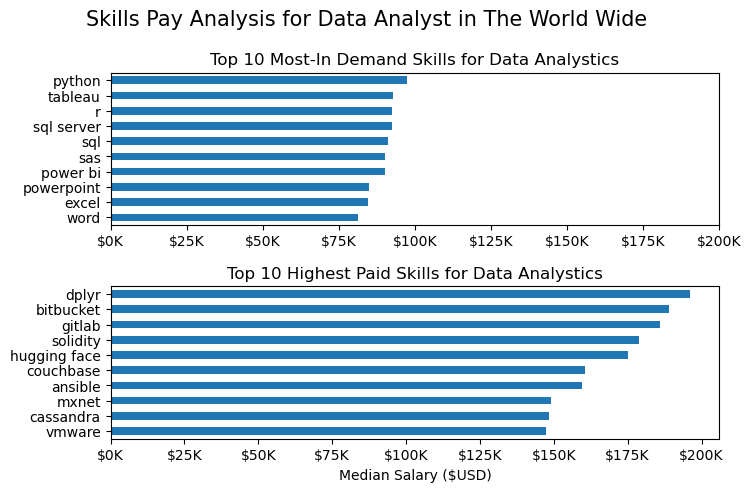

In [105]:


fig, ax = plt.subplots(2, 1)

DemandSkills[::-1].plot(kind='barh',y='median', ax=ax[0], title='Top 10 Most-In Demand Skills for Data Analystics', legend=False)
ax[0].set_ylabel('') # removing y label
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) #Format Salary form
ax[0].set_xlim(0,200000)

HighstSkills[::-1].plot(kind='barh',y='median', ax=ax[1], title='Top 10 Highest Paid Skills for Data Analystics', xlabel='Median Salary ($USD)',legend=False)
ax[1].set_ylabel('') # removing y label
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) #Format Salary form

fig.suptitle('Skills Pay Analysis for Data Analyst in The World Wide', fontsize=15)
fig.tight_layout() # fix the overlap
fig.set_size_inches(8,5)
plt.show()

